### K Vecinos más cercanos
- Clasificacion
- Basado en instancias
- Supervisado
- Sufre maldicion de la dimensionalidad
- No hay etapa de entrenamiento

La maldicion de la dimencionalidad, su desempeño cambia o se modifica de acuerdo al numero de característcias. A mayores dimensiones el algoritmo puede presentar fallas. En algunos planos las distancias parecen cercanas, pero en otros planos de diferentes dimensiones las distancias se ven muy diferenetes.

**Previos:**
- **Disminuir dimensionalidad**: PCA, Selección de características mediante análisis de correlación, etc.
- K: número de vecinos a tener en cuenta en la comparación
- K a elegir: ¿cuál es el K que genera una mejor predicción?, en otras palabras, hacer **Validación Cruzada** usando un **Grid Search**

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/iris.csv')
data.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal.length    150 non-null float64
sepal.width     150 non-null float64
petal.length    150 non-null float64
petal.width     150 non-null float64
variety         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data['variety'].value_counts()

Setosa        50
Virginica     50
Versicolor    50
Name: variety, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1141ff910>,
      dtype=object)

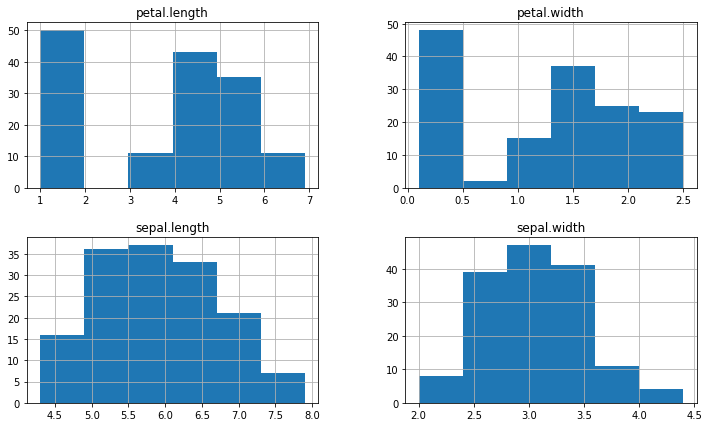

In [5]:
data.hist(bins = 6, figsize = (12,7))

Tenemos variables categóricas, lo que debemos hacer es convertirlas a numéricas

In [6]:
data['variety'] = pd.Categorical(data['variety'])
data['code'] = data['variety'].cat.codes
data.head()

sepal.length  sepal.width  petal.length  petal.width variety  code
0           5.1          3.5           1.4          0.2  Setosa     0
1           4.9          3.0           1.4          0.2  Setosa     0
2           4.7          3.2           1.3          0.2  Setosa     0
3           4.6          3.1           1.5          0.2  Setosa     0
4           5.0          3.6           1.4          0.2  Setosa     0

In [7]:
pd.Categorical(data['variety'])

[Setosa, Setosa, Setosa, Setosa, Setosa, ..., Virginica, Virginica, Virginica, Virginica, Virginica]
Length: 150
Categories (3, object): [Setosa, Versicolor, Virginica]

In [8]:
data['variety'].cat.codes

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

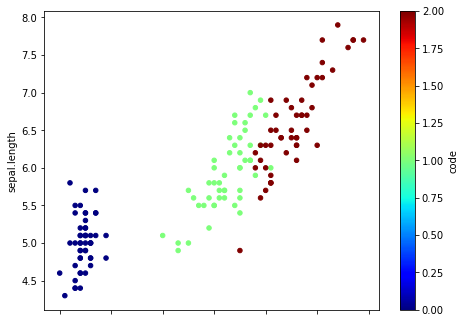

In [9]:
data.plot(kind = 'scatter',
          x = "petal.length",
          y = 'sepal.length',
          figsize = (7.5, 5.5),
          c = 'code',
          cmap = plt.get_cmap("jet"),
          colorbar = True
         )

In [10]:
import seaborn as sns
sns.pairplot(x_vars = ["petal.length"],
            y_vars = ["sepal.length"],
            data = data,
            hue = "variety",
            height = 5
            )

Eliminamos la columna de variedades, ya que lo tenemos codificado

In [11]:
data_1 = data.copy()
data_1 = data_1[data_1.code > 0]
data_1['code'] = data_1['code']-1
del data_1['variety']
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 50 to 149
Data columns (total 5 columns):
sepal.length    100 non-null float64
sepal.width     100 non-null float64
petal.length    100 non-null float64
petal.width     100 non-null float64
code            100 non-null int8
dtypes: float64(4), int8(1)
memory usage: 4.0 KB


In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data_1,
                                       test_size = 0.3,
                                       random_state = 42
                                      )

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
X_knn_train = np.c_[train_set.iloc[:,0:4]]
y_knn_train = np.r_[train_set['code']]
X_knn_test = np.c_[train_set.iloc[:,0:4]]
y_knn_test = np.r_[train_set['code']]

In [15]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_knn_train, y_knn_train);

# Predice la clase
y_predict_train = model_knn.predict(X_knn_train)

# Predice la probabilidad de pertenecer a la clase, son los scores
y_proba_train = model_knn.predict_proba(X_knn_train)

y_predict_test = model_knn.predict(X_knn_test)
print(y_knn_test)
print(y_predict_test)
y_proba_test = model_knn.predict_proba(X_knn_test)

[0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1]
[0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0
 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1]


In [16]:
model_knn.score(X_knn_train, y_knn_train)

0.9857142857142858

![Confution Matrix](static/conf_matrix.png)

$ Acc = \frac{TP + TN}{TP+TN+FP+FN}$   $ Recall = \frac{TP}{TP+FN} $   $ Presision = \frac{TP}{TP+FP} $   $ Specif = \frac{TN}{TN + FP} $

Curva ROC

Tiene las etiquetas y tiene los individuos. Ordena los de cada categoria de mayor a menos en su probabilidad. Muestra mediante un gráfico el area bajo la curva entre FR rate y TP rate

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_knn_train, y_predict_train)
acc_test = accuracy_score(y_knn_test, y_predict_test)

precision_train = precision_score(y_knn_train, y_predict_train)
precision_test = precision_score(y_knn_test, y_predict_test)

recall_train = recall_score(y_knn_train, y_predict_train)
recall_test = recall_score(y_knn_test, y_predict_test)

In [18]:
print(f"Test Accuracy: %{round(acc_test, 2)}")
print(f"Train Accuracy: %{round(acc_train, 2)}")
print(f"Test Precision: %{round(precision_test, 2)}")
print(f"Train Accuracy: %{round(precision_train, 2)}")
print(f"Test Recall: %{round(recall_test, 2)}")
print(f"Train Recall: %{round(recall_train, 2)}")

Test Accuracy: %0.99
Train Accuracy: %0.99
Test Precision: %1.0
Train Accuracy: %1.0
Test Recall: %0.97
Train Recall: %0.97


# Principal Component Analisis (PCA)

- Reduccion de la dimensionalidad
- No supervisado
- Método matemático más que ML
- Altamente sensible al escalamiento de los datos
- Utiliza combinaciones lineales de los datos originales, se pierde la semántica de los atributos
- Se mantiene la variabilidad
- El numero de de los componentes se calcula a partir de las varianza esplicada

Las transformaciones lineales consisten en rotar los ejes de modo que los datos se ajusten a un nuevos sistema con menos dimensiones

### Variabilidad 

Rango que toman los datos de una característica
- Alta variabilidad significa que el rango es grande y por lo tanto la característica es importante

### Pérdidad de Semántica
Quere decir que los datos quedan representados de otra manera, es por esto que ya no se pueden interpretar de la misma manera como se interpretan originalmente

### Varianza

Indica que tan dispersos están los datos con respecto a la madia de los datos.
- Es la variacion intragrupo

![Formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/e3947808047b62df2b6ec250418139b4e9e3e523)

### Covarianza
Indica como está un conjunto de datos con respecto a otro grupo de datos

$ \sigma_{jk} = \frac{1}{n}\sum_{i=1}^{n}(x_j^{(i)}-\mu_j)(x_k^{(i)}-\mu_k)$

### EigenValores


In [26]:
np.roots([1,3,2])

array([-2., -1.])

### Ejemplo

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_pca_train = sc.fit_transform(X_knn_train)
X_pca_test = sc.transform(X_knn_test)

In [38]:
pca = PCA(n_components = 3)
pca.fit(X_pca_train)
print(np.sum(pca.explained_variance_ratio_))
Ztrain = pca.fit_transform(X_pca_train)
Ztest = pca.fit_transform(X_pca_test)
print(Ztrain.shape)
print(Ztrain)

0.9783231064572804
(70, 3)
[[-9.77641139e-01 -6.77698430e-01  2.07944507e-01]
 [-1.04996276e+00 -5.24228604e-01 -5.02619149e-01]
 [ 2.58878239e+00  8.16603993e-01 -8.04835229e-01]
 [-8.42003208e-01 -2.72512533e-01 -8.69264795e-03]
 [ 2.03968818e+00  1.81237114e-01  3.50689867e-01]
 [-1.44407554e+00 -1.63851467e-01 -4.78027720e-02]
 [ 6.88647854e-01  1.41004042e-01 -1.58884593e-01]
 [ 1.33532191e+00 -8.32488676e-02  8.61408569e-01]
 [-3.04145213e-02 -1.55590488e+00  4.96238000e-01]
 [-1.01204208e+00 -5.46137718e-01  5.02273046e-01]
 [-1.70747488e+00 -3.39811573e-01 -4.90511708e-04]
 [-1.16667570e+00 -5.46410629e-01  7.22148202e-01]
 [-3.75606188e+00  1.53480625e-01  2.42211890e-01]
 [ 1.22296575e+00  4.19329198e-01  4.00993136e-01]
 [ 3.98585554e-01 -1.60677644e-01 -4.68473161e-01]
 [-2.56507003e+00  2.27301076e-01 -3.78250426e-01]
 [ 3.70845236e+00 -1.48180131e+00 -9.37032736e-01]
 [-4.20170529e-01 -6.70767653e-01 -7.34128406e-01]
 [ 1.26693856e+00  3.87426803e-01 -4.21361129e-02]
 [-7

# K-means

- Agrupamiento no supervisado
- Util en la identificacion de segmentos de mercado
- Facil de implementar
- Agrupamiento esférico
- Se basa en el calculo de centroides
- Se puede decidir el número de centroides a calcular 